In [1]:
import os
import numpy as np
import pickle
import sys

#%matplotlib inline
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif'
             #,'serif':['Computer Modern Roman']
#            })
rc('text', usetex=True)
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)


In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [183]:
# Here the 5 seeds for each env and model are plotted (just to check) and combined in one pickle

file = './rewards/rewards_gaussian_process_HalfCheetahMuJoCoEnv-v0_seed42_05-08-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    rewards_42 = pickle.load(fp)

file = './rewards/rewards_gaussian_process_HalfCheetahMuJoCoEnv-v0_seed43_05-08-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    rewards_43 = pickle.load(fp)
   
file = './rewards/rewards_gaussian_process_HalfCheetahMuJoCoEnv-v0_seed44_05-08-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    rewards_44 = pickle.load(fp)
    
file = './rewards/rewards_gaussian_process_HalfCheetahMuJoCoEnv-v0_seed45_05-08-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    rewards_45 = pickle.load(fp)
 
file = './rewards/rewards_gaussian_process_HalfCheetahMuJoCoEnv-v0_seed46_05-08-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    rewards_46 = pickle.load(fp)


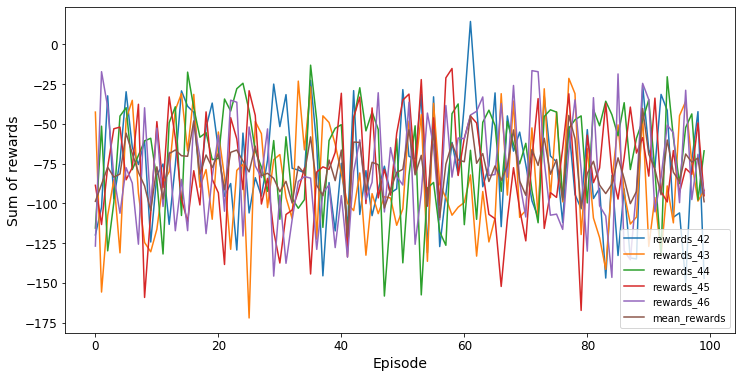

In [184]:
#just plotting for visualization

#fig_name = 'probabilistic_ensemble_Pendulum-v0_5seeds_02-06-2020.pickle'

a = np.array([rewards_42, rewards_43, 
              rewards_44, rewards_45, rewards_46
             ])
mean_rewards = np.mean(a, 0)

plt.figure(figsize=(12, 6))
plt.plot(rewards_42, label = 'rewards_42')
plt.plot(rewards_43, label = 'rewards_43')
plt.plot(rewards_44, label = 'rewards_44')
plt.plot(rewards_45, label = 'rewards_45')
plt.plot(rewards_46, label = 'rewards_46')
plt.plot(mean_rewards, label = 'mean_rewards')
plt.legend(loc="best")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
#save_fig(fig_name)
plt.show()

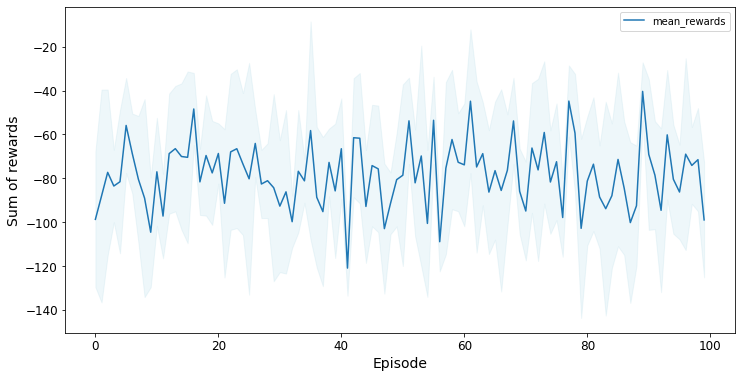

In [185]:
#fig_mean = 'dropoutNN_Pendulum-v0_seed42_17-06-2020'

#a = np.array([rewards_42, rewards_43, rewards_44, rewards_45, rewards_46])
mean = np.mean(a, 0).reshape(100,) # change according to env lenght
std = np.std(a, 0).reshape(100,)
n = np.arange(100)

plt.figure(figsize=(12, 6))
plt.plot(mean, label = 'mean_rewards')
plt.fill_between(n, mean + std, mean - std, color='lightblue', alpha=0.2)
plt.legend(loc="best")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
#save_fig(fig_mean)
plt.show()

In [186]:
# the 5 seeds are saved in one pickle

file = './rewards/rewards_gaussian_process_HalfCheetahMuJoCoEnv-v0_5seeds_05-08-2020.pickle'


with open(file, "wb") as fp:   #Pickling
    pickle.dump(a, fp)

In [59]:
#plotting all performance of the environment

file = './rewards/rewards_deterministicNN_HalfCheetahMuJoCoEnv-v0_5seeds_13-07-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    deterministicNN = pickle.load(fp)

file = './rewards/rewards_deterministic_ensemble_HalfCheetahMuJoCoEnv-v0_5seeds_13-07-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    deterministic_ensemble = pickle.load(fp)

file = './rewards/rewards_probabilistic_ensemble_HalfCheetahMuJoCoEnv-v0_5seeds_14-07-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    probabilistic_ensemble = pickle.load(fp)

file = './rewards/rewards_dropoutNN_HalfCheetahMuJoCoEnv-v0_5seeds_22-07-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    dropoutNN = pickle.load(fp)
    
file = './rewards/rewards_gaussian_process_HalfCheetahMuJoCoEnv-v0_5seeds_05-08-2020.pickle'

with open(file, "rb") as fp:   
    GPR = pickle.load(fp)
    
#file = './rewards/prova_rewards_deterministicNN_3x1024_HalfCheetahMuJoCoEnv-v0_5seeds_19-08-2020.pickle'

#with open(file, "rb") as fp:   
#    detNN3x1024 = pickle.load(fp)
    
#file = './Pendulum/rewards_gaussian_process_SVGP_Pendulum-v0_5seeds_05-06-2020.pickle'

#with open(file, "rb") as fp:   
#    SVGP = pickle.load(fp)

In [61]:
steps = 100 # to be set
n = np.arange(steps)

mean_deterministicNN = np.mean(deterministicNN, 0).reshape(steps,) 
std_deterministicNN = np.std(deterministicNN, 0).reshape(steps,)

mean_deterministic_ensemble = np.mean(deterministic_ensemble, 0).reshape(steps,)
std_deterministic_ensemble = np.std(deterministic_ensemble, 0).reshape(steps,)

mean_probabilistic_ensemble = np.mean(probabilistic_ensemble, 0).reshape(steps,) 
std_probabilistic_ensemble = np.std(probabilistic_ensemble, 0).reshape(steps,)

mean_dropoutNN = np.mean(dropoutNN, 0).reshape(steps,) 
std_dropoutNN = np.std(dropoutNN, 0).reshape(steps,)

mean_GPR = np.mean(GPR, 0).reshape(steps,) 
std_GPR = np.std(GPR, 0).reshape(steps,)

#mean_detNN3x1024 = np.mean(detNN3x1024, 0).reshape(steps,) 
#std_detNN3x1024 = np.std(detNN3x1024, 0).reshape(steps,)

#mean_SVGP = np.mean(SVGP, 0).reshape(200,) 
#std_SVGP = np.std(SVGP, 0).reshape(200,)

In [ ]:
#HalfCheetah 3x1024 deterministicNN

#fig = '3x1024_HalfCheetahMuJoCoEnv-v0_no_std_19-08-2020'
#alpha = 0.15

#plt.figure(figsize=(12, 6))
#plt.plot(mean_deterministicNN, color = 'C0', label = r'Deterministic NN 3x250')
#plt.plot(mean_deterministic_ensemble, color = 'C1', label = 'deterministic_ensemble')
#plt.plot(mean_probabilistic_ensemble, color = 'C2', label = 'anchored_ensemble')
#plt.plot(mean_dropoutNN, color = 'C3', label = r'Concrete Dropout NN')
#plt.plot(mean_GPR, color = 'C4', label = 'GPR')
#plt.plot(mean_detNN3x1024, color = 'C5', label = r'Deterministic NN 3x1024')
#plt.fill_between(n, np.minimum(mean_deterministicNN + std_deterministicNN, 1000), mean_deterministicNN - std_deterministicNN, color='C0', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_deterministic_ensemble + std_deterministic_ensemble, 1000), mean_deterministic_ensemble - std_deterministic_ensemble, color='C1', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_probabilistic_ensemble + std_probabilistic_ensemble, 1000), mean_probabilistic_ensemble - std_probabilistic_ensemble, color='C2', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_dropoutNN + std_dropoutNN, 1000), mean_dropoutNN - std_dropoutNN, color='C3', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_GPR + std_GPR, 1000), mean_GPR - std_GPR, color='C4', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_detNN3x1024 + std_detNN3x1024, 1000), mean_detNN3x1024 - std_detNN3x1024, color='C5', alpha=alpha)
#plt.legend(loc="lower right")
#plt.xlabel(r"Episode", fontsize=25, family="sans-serif")
#plt.ylabel(r"Sum of rewards", fontsize=25, family="sans-serif")
#plt.title(r'HalfCheetahMuJoCoEnv-v0', fontsize=25, family="sans-serif")
#save_fig(fig)
#plt.show()

In [52]:
fig = 'HalfCheetahMuJoCoEnv-v0_no_std_06-08-2020'
alpha = 0.15

plt.figure(figsize=(12, 6))
plt.plot(mean_deterministicNN, color = 'C0', label = r'Deterministic NN')
plt.plot(mean_deterministic_ensemble, color = 'C1', label = r'Deterministic Ensemble')
plt.plot(mean_probabilistic_ensemble, color = 'C2', label = r'Anchored Ensembling')
plt.plot(mean_dropoutNN, color = 'C3', label = r'Concrete Dropout NN')
plt.plot(mean_GPR, color = 'C4', label = r'Gaussian Process')
#plt.fill_between(n, np.minimum(mean_deterministicNN + std_deterministicNN, 10000), mean_deterministicNN - std_deterministicNN, color='C0', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_deterministic_ensemble + std_deterministic_ensemble, 10000), mean_deterministic_ensemble - std_deterministic_ensemble, color='C1', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_probabilistic_ensemble + std_probabilistic_ensemble, 10000), mean_probabilistic_ensemble - std_probabilistic_ensemble, color='C2', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_dropoutNN + std_dropoutNN, 10000), mean_dropoutNN - std_dropoutNN, color='C3', alpha=alpha)
#plt.fill_between(n, np.minimum(mean_GPR + std_GPR, 10000), mean_GPR - std_GPR, color='C4', alpha=alpha)
plt.legend(loc="lower right")
plt.xlabel(r"Episode", fontsize=25, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=25, family="sans-serif")
plt.title(r'HalfCheetahMuJoCoEnv-v0', fontsize=25, family="sans-serif")
save_fig(fig)
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


Saving figure HalfCheetahMuJoCoEnv-v0_no_std_06-08-2020


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [42]:
fig = 'InvertedDoublePendulumMuJoCoEnv_detNN'

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(deterministicNN[i])
plt.xlabel(r"Episode", fontsize=25, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=25, family="sans-serif")
plt.title(r'InvertedDoublePendulumMuJoCoEnv-v0', fontsize=25, family="sans-serif")
plt.ylim(-220, 20)
save_fig(fig)   
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Saving figure InvertedDoublePendulumMuJoCoEnv_detNN


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


In [58]:
fig = 'HalfCheetahMuJoCoEnv_det_ens'
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(deterministic_ensemble[i])
plt.xlabel(r"Episode", fontsize=35, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=35, family="sans-serif")
plt.title(r'HalfCheetahMuJoCoEnv-v0', fontsize=35, family="sans-serif")
plt.ylim(-220, 120)
save_fig(fig)
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Saving figure HalfCheetahMuJoCoEnv_det_ens


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


In [25]:
fig = 'AntMuJoCoEnv_anch_ens'
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(probabilistic_ensemble[i])
plt.xlabel(r"Episode", fontsize=25, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=25, family="sans-serif")
plt.title(r'InvertedPendulumMuJoCoEnv-v0', fontsize=25, family="sans-serif")
plt.ylim(-10, 370)
save_fig(fig)
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Saving figure AntMuJoCoEnv_anch_ens


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


In [57]:
fig = 'HalfCheetahMuJoCoEnv_Concrete_Dropout'

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(dropoutNN[i])
plt.xlabel(r"Episode", fontsize=35, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=35, family="sans-serif")
plt.title(r'HalfCheetahMuJoCoEnv-v0', fontsize=35, family="sans-serif")
plt.ylim(-220, 120)
save_fig(fig)
plt.show()

Saving figure HalfCheetahMuJoCoEnv_Concrete_Dropout


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


In [28]:
b = np.mean(dropoutNN, 0)
np.mean(b), np.std(b), np.min(b), np.max(b)

(-368.25488, 387.69263, -1519.0043, 160.25784)

In [56]:
fig = 'HalfCheetahMuJoCoEnv_GPR'

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(GPR[i])
plt.xlabel(r"Episode", fontsize=35, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=35, family="sans-serif")
plt.title(r'HalfCheetahMuJoCoEnv-v0', fontsize=35, family="sans-serif")
plt.ylim(-220, 120)
save_fig(fig)
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Saving figure HalfCheetahMuJoCoEnv_GPR


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


In [64]:
file = './rewards/rewards_dropoutNN_InvertedDoublePendulumMuJoCoEnv-v0_seed42-75_12-08-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    rewards_34 = pickle.load(fp)

mean = np.mean(rewards_34, 0).reshape(100,) # change (200,) according to env lenght
std = np.std(rewards_34, 0).reshape(100,)
n = np.arange(100)

plt.figure(figsize=(12, 8))
plt.plot(mean, label = r'mean_rewards')
plt.fill_between(n, mean + std, mean - std, color='lightblue', alpha=0.2)
plt.legend(loc="best")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
#save_fig(fig_mean)
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [70]:
fig_name = 'InvertedDoublePendulum_34seeds'

plt.figure(figsize=(12, 8))
for i in range(34):
    plt.plot(rewards_34[i])
plt.xlabel(r"Episode", fontsize=30, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=30, family="sans-serif")
plt.title(r'InvertedDoublePendulumMuJoCoEnv-v0', fontsize=30, family="sans-serif")
save_fig(fig_name)
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Saving figure InvertedDoublePendulum_34seeds


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


In [71]:
file = './rewards/rewards_dropoutNN_InvertedDoublePendulumMuJoCoEnv-v0_5seeds_08-07-2020.pickle'

with open(file, "rb") as fp:   # Unpickling
    rewards_5 = pickle.load(fp)

mean_5 = np.mean(rewards_5, 0).reshape(100,) # change (200,) according to env lenght
std_5 = np.std(rewards_5, 0).reshape(100,)
n = np.arange(100)

fig_name = 'InvertedDoublePendulum_5seeds'

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(rewards_5[i])
plt.xlabel(r"Episode", fontsize=30, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=30, family="sans-serif")
plt.title(r'InvertedDoublePendulumMuJoCoEnv-v0', fontsize=30, family="sans-serif")
save_fig(fig_name)
plt.show()

Saving figure InvertedDoublePendulum_5seeds


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [67]:
fig_name = 'InvertedDoublePendulum_comparison_34'
plt.figure(figsize=(12, 8))
plt.plot(mean_5, label = r'5seeds')
plt.fill_between(n, np.minimum(mean_5 + std_5, 0), mean_5 - std_5, color='C0', alpha=0.2)
plt.plot(mean, label = r'34seeds')
plt.fill_between(n, np.minimum(mean + std, 0), mean - std, color='C1', alpha=0.2)
plt.legend(loc="best")
plt.xlabel(r"Episode", fontsize=25, family="sans-serif")
plt.ylabel(r"Sum of rewards", fontsize=25, family="sans-serif")
plt.title(r'InvertedDoublePendulumMuJoCoEnv-v0', fontsize=25, family="sans-serif")
save_fig(fig_name)
plt.show()

C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Saving figure InvertedDoublePendulum_comparison_34


C:\Users\giaa9\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':
